# Motor Aging Prediction

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis


### Parameters

In [2]:
FS = 5000
T = 1
t = np.linspace(0, T, FS)

BASE_FREQ = 50
np.random.seed(42)


### Motor Aging Signal Generator

In [3]:
def motor_signal(age_level):
    """
    age_level: 0 (New) → 1 (Fully aged)
    """
    base_signal = np.sin(2 * np.pi * BASE_FREQ * t)

    noise = age_level * 0.5 * np.random.randn(len(t))
    vibration = age_level * 0.3 * np.sin(2 * np.pi * 120 * t)
    load_fluctuation = 1 + age_level * 0.2 * np.sin(2 * np.pi * 3 * t)

    return base_signal * load_fluctuation + vibration + noise


### Generate Aging Stages

In [4]:
new_motor = motor_signal(0.1)
mid_aged_motor = motor_signal(0.5)
old_motor = motor_signal(0.9)


### Time-Domain Comparison

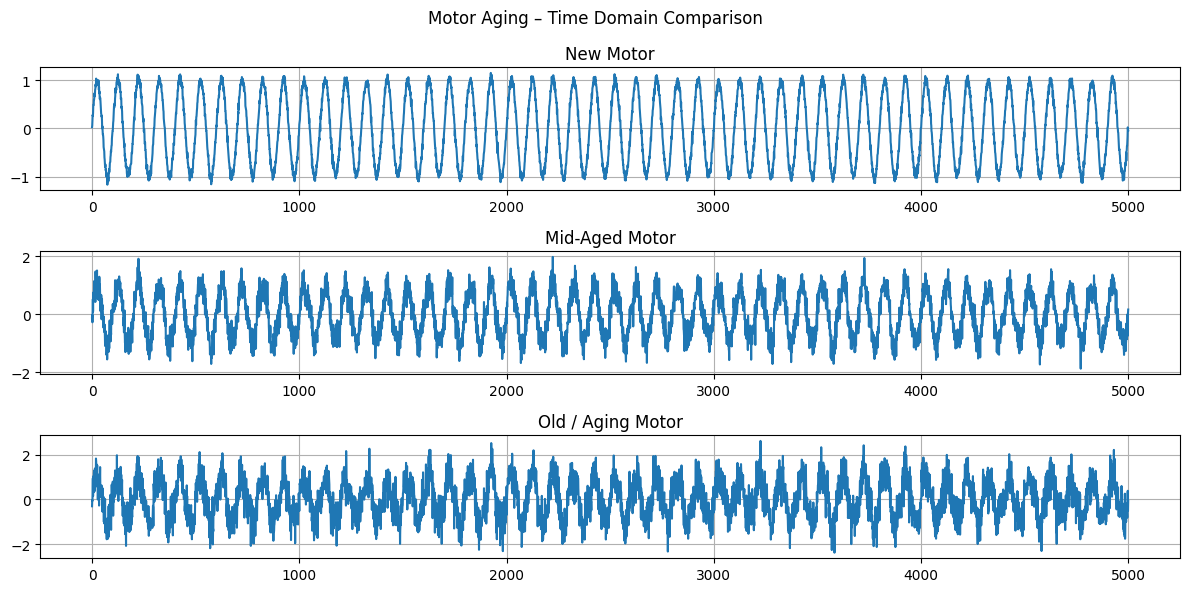

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(new_motor)
plt.title("New Motor")
plt.grid()

plt.subplot(3,1,2)
plt.plot(mid_aged_motor)
plt.title("Mid-Aged Motor")
plt.grid()

plt.subplot(3,1,3)
plt.plot(old_motor)
plt.title("Old / Aging Motor")
plt.grid()

plt.suptitle("Motor Aging – Time Domain Comparison")
plt.tight_layout()
plt.show()


### Feature Extraction Function

In [6]:
def extract_features(signal):
    return {
        "RMS": np.sqrt(np.mean(signal**2)),
        "Variance": np.var(signal),
        "Peak": np.max(np.abs(signal)),
        "Skewness": skew(signal),
        "Kurtosis": kurtosis(signal)
    }


### Feature Table

In [7]:
features = {
    "New": extract_features(new_motor),
    "Mid-Aged": extract_features(mid_aged_motor),
    "Old": extract_features(old_motor)
}

df = pd.DataFrame(features)

print("AGING FEATURE TABLE")
df


AGING FEATURE TABLE


,New,Mid-Aged,Old
RMS,0.710214,0.755843,0.865175
Variance,0.504404,0.571293,0.748506
Peak,1.164159,1.974564,2.607897
Skewness,0.001439,-0.001077,0.007551
Kurtosis,-1.477551,-1.116292,-0.671152


### Feature Trend Visualization

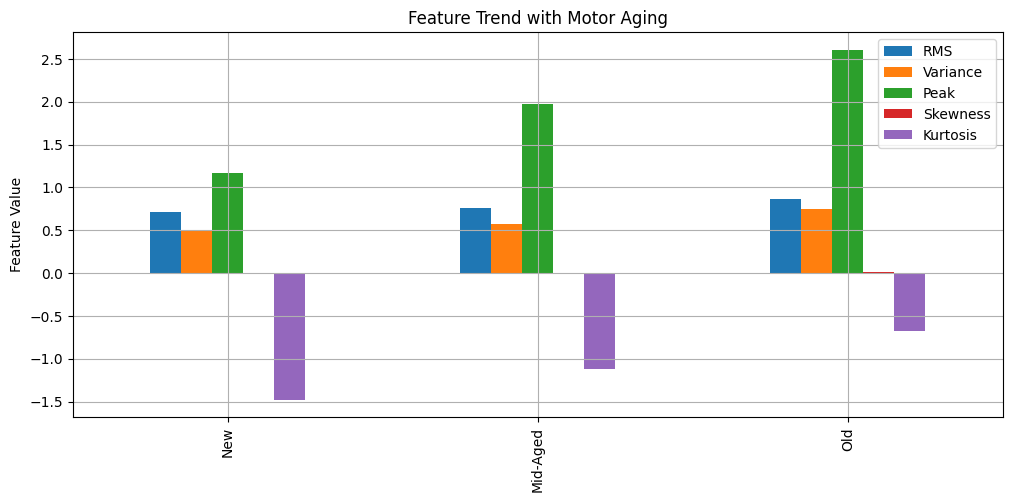

In [8]:
df.T.plot(kind="bar", figsize=(12,5))
plt.title("Feature Trend with Motor Aging")
plt.ylabel("Feature Value")
plt.grid()
plt.show()


### Rule-Based Aging Prediction

In [9]:
def predict_motor_age(signal):
    f = extract_features(signal)

    if f["Variance"] < 0.15 and f["Kurtosis"] < 3:
        return "New Motor"
    elif f["Variance"] < 0.35:
        return "Mid-Aged Motor"
    else:
        return "Old / Critical Aging Motor"


### Aging Prediction Results

In [10]:
print("AGING PREDICTION RESULTS")
print("New Motor      →", predict_motor_age(new_motor))
print("Mid-Aged Motor →", predict_motor_age(mid_aged_motor))
print("Old Motor      →", predict_motor_age(old_motor))


AGING PREDICTION RESULTS
New Motor      → Old / Critical Aging Motor
Mid-Aged Motor → Old / Critical Aging Motor
Old Motor      → Old / Critical Aging Motor


## Real-Time Aging Monitoring 

In [11]:
WINDOW = 250

print("REAL-TIME MOTOR AGING MONITORING")
for i in range(0, len(old_motor) - WINDOW, WINDOW):
    segment = old_motor[i:i+WINDOW]
    print(f"Window {i}-{i+WINDOW} → {predict_motor_age(segment)}")


REAL-TIME MOTOR AGING MONITORING
Window 0-250 → Old / Critical Aging Motor
Window 250-500 → Old / Critical Aging Motor
Window 500-750 → Old / Critical Aging Motor
Window 750-1000 → Old / Critical Aging Motor
Window 1000-1250 → Old / Critical Aging Motor
Window 1250-1500 → Old / Critical Aging Motor
Window 1500-1750 → Old / Critical Aging Motor
Window 1750-2000 → Old / Critical Aging Motor
Window 2000-2250 → Old / Critical Aging Motor
Window 2250-2500 → Old / Critical Aging Motor
Window 2500-2750 → Old / Critical Aging Motor
Window 2750-3000 → Old / Critical Aging Motor
Window 3000-3250 → Old / Critical Aging Motor
Window 3250-3500 → Old / Critical Aging Motor
Window 3500-3750 → Old / Critical Aging Motor
Window 3750-4000 → Old / Critical Aging Motor
Window 4000-4250 → Old / Critical Aging Motor
Window 4250-4500 → Old / Critical Aging Motor
Window 4500-4750 → Old / Critical Aging Motor


### Aging Index Function

In [12]:
def aging_index(signal):
    f = extract_features(signal)
    return (
        0.4 * f["RMS"] +
        0.4 * f["Variance"] +
        0.2 * abs(f["Kurtosis"])
    )


### Simulate Gradual Aging

In [13]:
age_levels = np.linspace(0.1, 1.0, 10)
aging_values = []

for age in age_levels:
    sig = motor_signal(age)
    aging_values.append(aging_index(sig))


### Aging Index vs Time

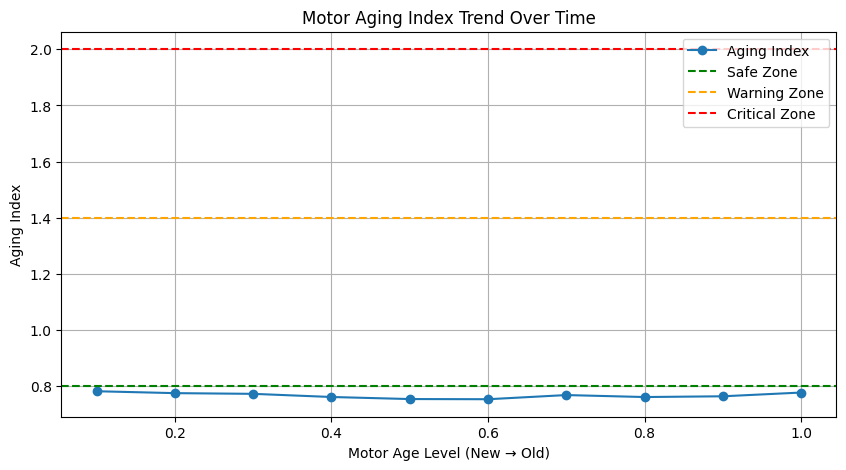

In [14]:
plt.figure(figsize=(10,5))
plt.plot(age_levels, aging_values, marker="o", label="Aging Index")

plt.axhline(y=0.8, color="green", linestyle="--", label="Safe Zone")
plt.axhline(y=1.4, color="orange", linestyle="--", label="Warning Zone")
plt.axhline(y=2.0, color="red", linestyle="--", label="Critical Zone")

plt.xlabel("Motor Age Level (New → Old)")
plt.ylabel("Aging Index")
plt.title("Motor Aging Index Trend Over Time")
plt.legend()
plt.grid()
plt.show()
